In [93]:
import pandas as pd
import numpy as np 

df = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\stubbs_africahappiness.csv")
population = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\2022_population.csv")
gini_index = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\data-gini-index.csv")
work_week = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\weekly-hour.csv")

In [94]:
#Concatenating the dataset by country name, 
df = pd.merge(df, population[['country', '2022_last_updated',"growth_rate"]], left_on='Country Name', right_on='country', how='inner')
df = pd.merge(df,gini_index[["country","giniWB"]],left_on="country",right_on="country",how="inner")


df["population"] = df["2022_last_updated"]
#Dropping excess columns
df.drop('country', axis=1, inplace=True)
df.drop("2022_last_updated",axis=1,inplace=True)

#Dropping all countries outside of africa
df.drop(df[~(df['Regional Indicator'] == "Africa")].index, inplace=True)
df["population"] = pd.to_numeric(df["population"], errors="coerce")


In [3]:
df.to_csv("ConcatenatedDataOfAfrica.csv",index=True)

Setting the theme for our plots


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_style = {
    "figure.figsize": (12, 7),
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "grid.color": "#e2e2e2",
    "axes.edgecolor": "#e2e2e2",
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "sans-serif"],
}

# Set the custom style
plt.style.use(custom_style)
# Save the style
plt.style.use(custom_style)
plt.savefig("custom_style.png", dpi=300, bbox_inches="tight")


<Figure size 864x504 with 0 Axes>

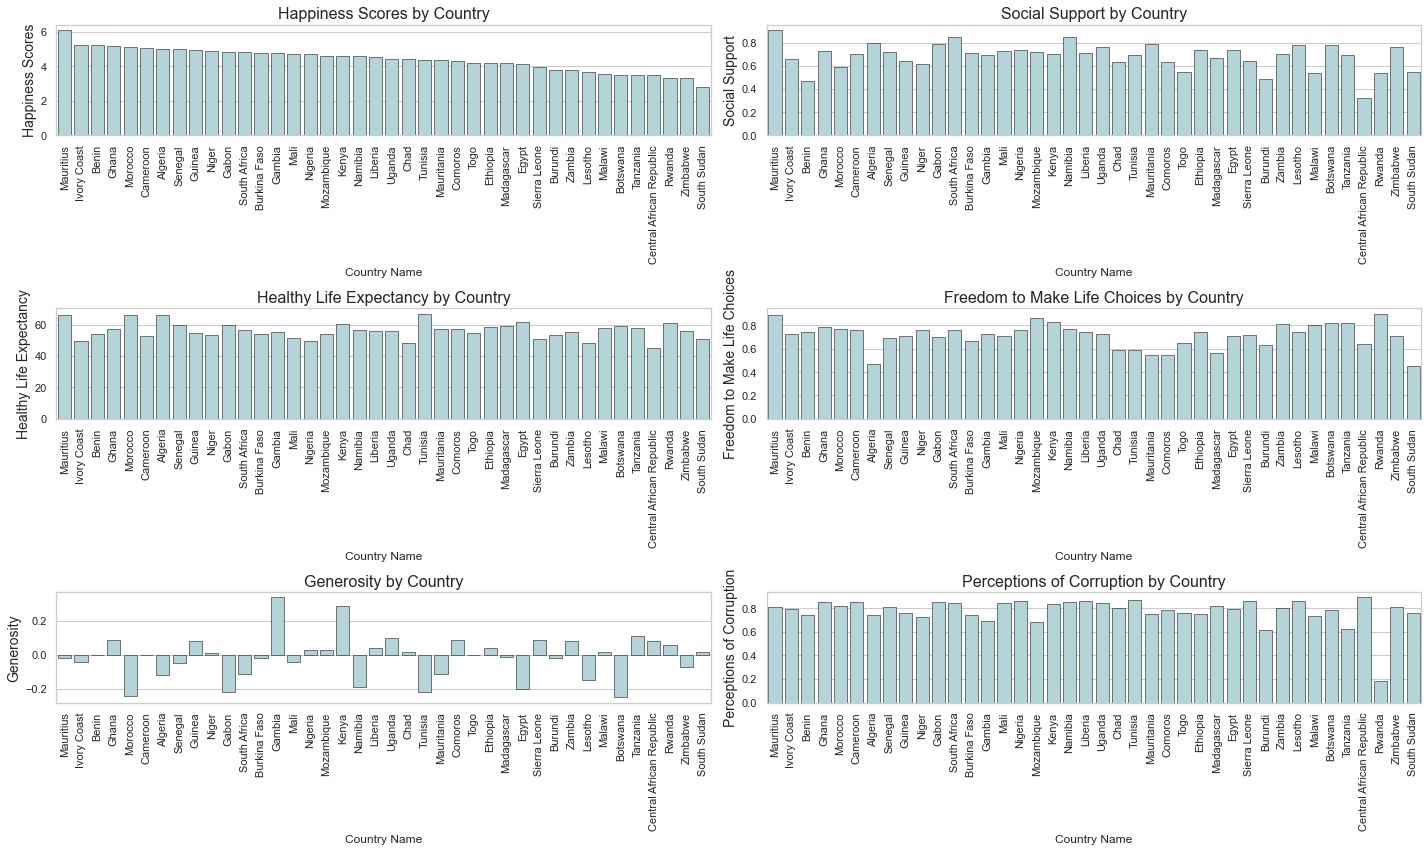

In [90]:
attributes =["Happiness Scores","Social Support","Healthy Life Expectancy","Freedom to Make Life Choices","Generosity","Perceptions of Corruption","population"]

fig,ax = plt.subplots(3,2,figsize=(20,12))
ax = ax.flatten()

for i in range (len(attributes)-1):
    current_ax = ax[i]
    variable = attributes[i]
    df[variable]=pd.to_numeric(df[variable], errors="coerce")
    sns.barplot(ax=current_ax,y = variable,x="Country Name", linewidth=0.5, edgecolor="black",data=df,color="#AED9E0")
    current_ax.set_ylabel(variable, fontsize=14)
    current_ax.set_title(variable+ " by Country", fontsize=16)
    current_ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()


In [104]:
import json
import ipywidgets as widgets

with open("africa-outline-with-countries_6.geojson") as f:
    gson = json.load(f)


import plotly.express as px 
countries = df["Country Name"].unique()
fig = px.choropleth(df,geojson=gson,locations=countries,color_continuous_scale = "Viridis",range_color=(0,1),scope="africa",labels={"Happiness Scores"})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


ImportError: cannot import name 'IFrame' from 'jupyterlab_iframe' (c:\Users\45304\anaconda3\lib\site-packages\jupyterlab_iframe\__init__.py)